In [61]:
# GOAL: HAVE EACH ANALYSIS SECTION COMPUTE A STANDARD SET OF CALCULATIONS FOR RISK METRICS AND CORRELATION

"""
For now, we keep it simple. If we need to expand, we can. 
We are taking what we need to in order to understand how each basket of currencies 
is correlated to the market proxy (bitcoin)
"""

'\nFor now, we keep it simple. If we need to expand, we can. \nWe are taking what we need to in order to understand how each basket of currencies \nis correlated to the market proxy (bitcoin)\n'

In [80]:
# STEP 1: IMPORT DEPENDENCIES

from pathlib import Path

import pandas as pd

import numpy as np




import seaborn as sns

%matplotlib inline


import hvplot

In [81]:
# STEP 2: IMPORT DATA AS DATAFRAME
"""
Determnine if we are reading csv data, running individual api calls, or querying an in-house database
"""

#reading in csv data
df_2020 = pd.read_csv(
    Path('data/2020_sheet.csv'),
)

# display dataframe
df_2020

,Unnamed: 0,btc_start_date,price_open,price_close_BTC,volume_traded,eth_start_date,price_open.1,price_close_ETH,volume_traded.1,ltc_start_date,...,price_close_SC,volume_traded.10,usdt_start_date,price_open.11,price_close_USDT,volume_traded.11,dash_start_date,price_open.12,price_close_DASH,volume_traded.12
0,1,2020-01-01T00:00:00.0000000Z,7168.3,9339.3,182284.0527,2020-01-01T00:00:00.0000000Z,128.66,179.68,1754990.188,2020-01-01T00:00:00.0000000Z,...,0.00160,1.209589e+08,2020-01-01T00:00:00.0000000Z,0.9962,0.9983,5.839821e+07,2020-01-01T00:00:00.0000000Z,40.855,115.961,257263.21400
1,2,2020-02-01T00:00:00.0000000Z,9337.1,8529.1,129239.4747,2020-02-01T00:00:00.0000000Z,179.68,217.78,2548585.871,2020-02-01T00:00:00.0000000Z,...,0.00227,4.236297e+08,2020-02-01T00:00:00.0000000Z,0.9983,1.0002,7.386873e+07,2020-02-01T00:00:00.0000000Z,115.514,85.254,101856.82900
2,3,2020-03-01T00:00:00.0000000Z,8526.1,6422.1,374848.4202,2020-03-01T00:00:00.0000000Z,217.31,133.10,4168217.664,2020-03-01T00:00:00.0000000Z,...,0.00128,4.123741e+08,2020-03-01T00:00:00.0000000Z,1.0002,1.0017,1.340408e+08,2020-03-01T00:00:00.0000000Z,85.328,64.946,161380.67090
3,4,2020-04-01T00:00:00.0000000Z,6422.2,8629.6,493231.2333,2020-04-01T00:00:00.0000000Z,133.02,206.20,4415679.466,2020-04-01T00:00:00.0000000Z,...,0.00205,3.445902e+08,2020-04-01T00:00:00.0000000Z,1.0018,1.0005,2.470204e+08,2020-04-01T00:00:00.0000000Z,64.978,80.817,88228.89156
4,5,2020-05-01T00:00:00.0000000Z,8628.3,9447.4,273682.8022,2020-05-01T00:00:00.0000000Z,206.16,231.76,1904909.998,2020-05-01T00:00:00.0000000Z,...,0.00235,4.944967e+08,2020-05-01T00:00:00.0000000Z,1.0003,0.9994,2.094059e+08,2020-05-01T00:00:00.0000000Z,81.300,76.331,57169.60406
5,6,2020-06-01T00:00:00.0000000Z,9447.9,9133.9,159149.8859,2020-06-01T00:00:00.0000000Z,231.52,225.68,1478852.515,2020-06-01T00:00:00.0000000Z,...,0.00281,9.267979e+08,2020-06-01T00:00:00.0000000Z,0.9994,0.9998,1.724823e+08,2020-06-01T00:00:00.0000000Z,76.093,68.160,42567.56452
6,7,2020-07-01T00:00:00.0000000Z,9135.0,11356.2,119522.5584,2020-07-01T00:00:00.0000000Z,225.61,347.00,1755724.521,2020-07-01T00:00:00.0000000Z,...,0.00305,8.621860e+08,2020-07-01T00:00:00.0000000Z,0.9998,1.0015,1.899132e+08,2020-07-01T00:00:00.0000000Z,67.767,82.629,66764.51436
7,8,2020-08-01T00:00:00.0000000Z,11356.1,11656.9,132919.9780,2020-08-01T00:00:00.0000000Z,346.90,433.98,2404929.375,2020-08-01T00:00:00.0000000Z,...,0.00458,1.128243e+09,2020-08-01T00:00:00.0000000Z,1.0014,1.0002,3.606419e+08,2020-08-01T00:00:00.0000000Z,82.725,86.271,162348.71920
8,9,2020-09-01T00:00:00.0000000Z,11657.2,10774.9,117605.7608,2020-09-01T00:00:00.0000000Z,434.00,359.69,2639400.990,2020-09-01T00:00:00.0000000Z,...,0.00308,5.518485e+08,2020-09-01T00:00:00.0000000Z,1.0002,1.0000,4.290422e+08,2020-09-01T00:00:00.0000000Z,86.041,69.126,60058.27898
9,10,2020-10-01T00:00:00.0000000Z,10774.9,13809.1,126881.7274,2020-10-01T00:00:00.0000000Z,359.70,386.81,1371747.913,2020-10-01T00:00:00.0000000Z,...,0.00247,3.854770e+08,2020-10-01T00:00:00.0000000Z,0.9999,1.0009,3.864529e+08,2020-10-01T00:00:00.0000000Z,69.140,70.231,65521.67667


In [82]:
# review column names
df_2020.columns

Index(['Unnamed: 0', 'btc_start_date', 'price_open', 'price_close_BTC',
       'volume_traded', 'eth_start_date', 'price_open.1', 'price_close_ETH',
       'volume_traded.1', 'ltc_start_date', 'price_open.2', 'price_close_ITC',
       'volume_traded.2', 'ada_start_date', 'price_open.3', 'price_close_ADA',
       'volume_traded.3', 'doge_start_date', 'price_open.4',
       'price_close_DOGE', 'volume_traded.4', 'xlm_start_date', 'price_open.5',
       'price_close_XLM', 'volume_traded.5', 'xrp_start_date', 'price_open.6',
       'price_close_XRP', 'volume_traded.6', 'lisk_start_date', 'price_open.7',
       'price_close_LISK', 'volume_traded.7', 'waves_start_date',
       'price_open.8', 'price_close_WAVES', 'volume_traded.8',
       'zec_start_date', 'price_open.9', 'price_close_ZEC', 'volume_traded.9',
       'sc_start_date', 'price_open.10', 'price_close_SC', 'volume_traded.10',
       'usdt_start_date', 'price_open.11', 'price_close_USDT',
       'volume_traded.11', 'dash_start_date

In [83]:
# finalizing working df
final_2020_df = pd.DataFrame()
final_2020_df['BTC_Monthly_Close'] = df_2020['price_close_BTC']
final_2020_df['ETH_Monthly_Close'] = df_2020['price_close_ETH']
final_2020_df['ITC_Monthly_Close'] = df_2020['price_close_ITC']
final_2020_df['ADA_Monthly_Close'] = df_2020['price_close_ADA']
final_2020_df['DOGE_Monthly_Close'] = df_2020['price_close_DOGE']
final_2020_df['XLM_Monthly_Close'] = df_2020['price_close_XLM']
final_2020_df['XRP_Monthly_Close'] = df_2020['price_close_XRP']
final_2020_df['LISK_Monthly_Close'] = df_2020['price_close_LISK']
final_2020_df['ZEC_Monthly_Close'] = df_2020['price_close_ZEC']
final_2020_df['SC_Monthly_Close'] = df_2020['price_close_SC']
final_2020_df['USDT_Monthly_Close'] = df_2020['price_close_USDT']
final_2020_df['DASH_Monthly_Close'] = df_2020['price_close_DASH']


# display df
final_2020_df

,BTC_Monthly_Close,ETH_Monthly_Close,ITC_Monthly_Close,ADA_Monthly_Close,DOGE_Monthly_Close,XLM_Monthly_Close,XRP_Monthly_Close,LISK_Monthly_Close,ZEC_Monthly_Close,SC_Monthly_Close,USDT_Monthly_Close,DASH_Monthly_Close
0,9339.3,179.68,67.76,0.053794,0.002364,0.060831,0.23890,1.149000,66.20,0.00160,0.9983,115.961
1,8529.1,217.78,58.13,0.047284,0.002213,0.056963,0.22883,1.281456,49.00,0.00227,1.0002,85.254
2,6422.1,133.10,39.25,0.030575,0.001790,0.040939,0.17374,0.977245,30.93,0.00128,1.0017,64.946
3,8629.6,206.20,46.37,0.047481,0.002337,0.067277,0.21178,1.218623,44.61,0.00205,1.0005,80.817
4,9447.4,231.76,45.59,0.074002,0.002538,0.070787,0.20239,1.197980,51.77,0.00235,0.9994,76.331
5,9133.9,225.68,41.25,0.083837,0.002303,0.066922,0.17538,1.145737,51.51,0.00281,0.9998,68.160
6,11356.2,347.00,58.29,0.140104,0.003221,0.096714,0.26013,1.280154,74.36,0.00305,1.0015,82.629
7,11656.9,433.98,60.97,0.122566,0.003227,0.096914,0.28132,1.799000,78.72,0.00458,1.0002,86.271
8,10774.9,359.69,46.24,0.101360,0.002628,0.074600,0.24184,1.196873,63.94,0.00308,1.0000,69.126
9,13809.1,386.81,55.82,0.093183,0.002575,0.077742,0.23999,1.052737,58.12,0.00247,1.0009,70.231


In [84]:
# STEP 3: CALCULATE Monthly RETURNS FOR EACH CURRENCY IN Designated Time range from  DATAFRAME, DROP NULL VALUES
"""

Will need: .pct_change().dropna(inplace = True)

"""

# amking dataframe for calcs
monthly_2020_returns = pd.DataFrame()

# calculating monthly returns on dataframe


monthly_2020_returns['btc_2020_returns'] = final_2020_df['BTC_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['eth_2020_returns']= final_2020_df['ETH_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['itc_2020_returns'] = final_2020_df['ITC_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['ada_2020_returns'] = final_2020_df['ADA_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['doge_2020_returns'] = final_2020_df['DOGE_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['xlm_2020_returns'] = final_2020_df['XLM_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['xrp_2020_returns'] = final_2020_df['XRP_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['lisk_2020_returns'] = final_2020_df['LISK_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['zec_2020_returns'] = final_2020_df['ZEC_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['sc_2020_returns'] = final_2020_df['SC_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['usdt_2020_returns'] = final_2020_df['USDT_Monthly_Close'].pct_change().dropna()
monthly_2020_returns['dash_2020_returns'] = final_2020_df['DASH_Monthly_Close'].pct_change().dropna()

In [85]:
# STEP 4: CALCULATE VARIANCE OF BITCOIN FOR DATAFRAME
"""

Will need: monthly_returns.var()

"""
# assign to market variance value
market_var = final_2020_df['BTC_Monthly_Close'].var()
market_var


38862067.28696969

In [86]:
# STEP 5: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
"""
Use monthly returns of currency and monthly returns of bitcoin as market proxy

"""
# testing against market to make sure calc is working properly
market_cov = final_2020_df['BTC_Monthly_Close'].cov(final_2020_df['BTC_Monthly_Close'])
market_cov

38862067.28696969

In [87]:
# STEP 5: CALCULATE COVARIANCE OF EACH CURRENCY RELATIVE TO BITCOIN
# there's definitely a more efficient way to do this
eth_cov = monthly_2020_returns['eth_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
itc_cov = monthly_2020_returns['itc_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
ada_cov = monthly_2020_returns['ada_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
doge_cov = monthly_2020_returns['doge_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
xlm_cov = monthly_2020_returns['xlm_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
xrp_cov = monthly_2020_returns['xrp_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
lisk_cov = monthly_2020_returns['lisk_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
zec_cov = monthly_2020_returns['zec_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
sc_cov = monthly_2020_returns['sc_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
usdt_cov = monthly_2020_returns['usdt_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])
dash_cov = monthly_2020_returns['dash_2020_returns'].cov(monthly_2020_returns['btc_2020_returns'])

In [88]:
# STEP 6: CALCULATE BETA OF EACH CURRENCY

"""
beta = covariance of asset to market / variance of market

use previous calculations for market variance and covariance of assets
"""


btc_beta = market_cov / market_var
eth_beta = eth_cov / market_var
itc_beta = itc_cov / market_var
ada_beta = ada_cov / market_var
doge_beta = doge_cov / market_var
xlm_beta = xlm_cov / market_var
xrp_beta = xrp_cov / market_var
lisk_beta = lisk_cov / market_var
zec_beta = zec_cov / market_var
sc_beta = sc_cov / market_var
usdt_beta = usdt_cov / market_var
dash_beta = dash_cov / market_var


In [89]:
# making list for convenience
Beta_list = [btc_beta, eth_beta, itc_beta, ada_beta, doge_beta, xlm_beta, xrp_beta, lisk_beta, zec_beta, sc_beta, usdt_beta, dash_beta]

# Beta_list

<AxesSubplot:>

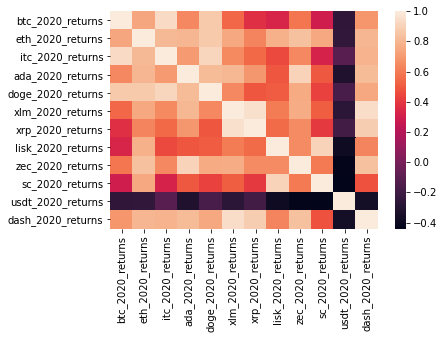

In [90]:
# Display Correlation Heatmap With Seaborn

"""
NEW CELL to check monthly returns are displayed with pct_change already applied
- Take dataframe of daily returns from step 3 (pct_change drop na already applied)

NEW CELL to check correlation dataframe
- correlation = monthly_returns_dataframe.corr()

NEW CELL to display heatmap
- sns.heatmap(correlation)


"""

correlation = monthly_2020_returns.corr()
sns.heatmap(correlation)

In [91]:
# what next?


<AxesSubplot:>

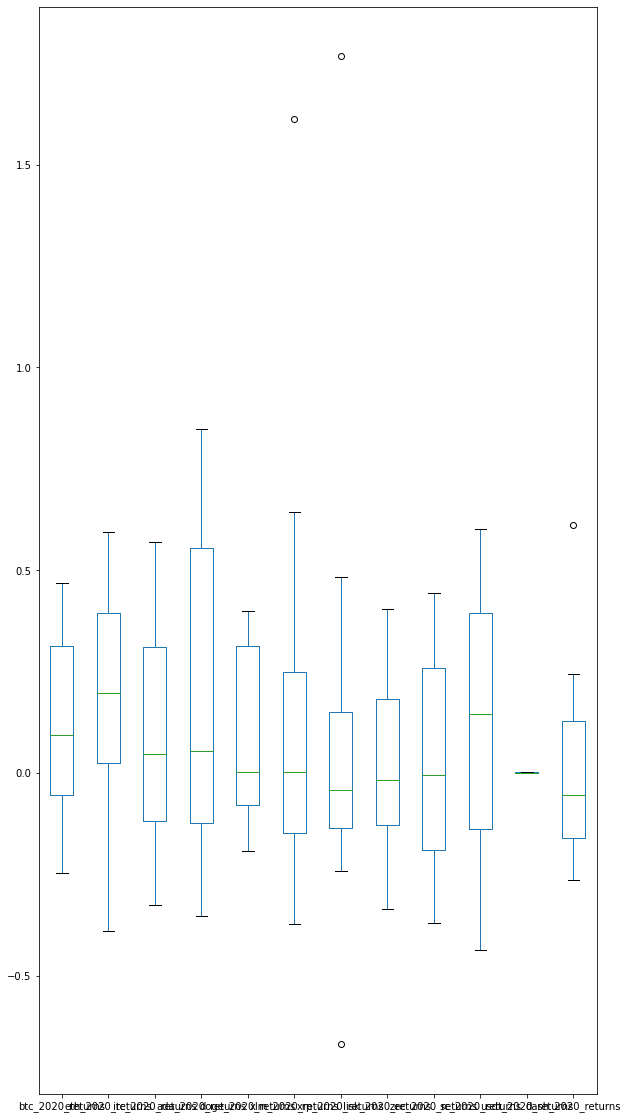

In [95]:
monthly_2020_returns.plot(kind = "box", figsize = (20, 5))